<a href="https://colab.research.google.com/github/Tomoki-Nakashima/RateControl/blob/master/my_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

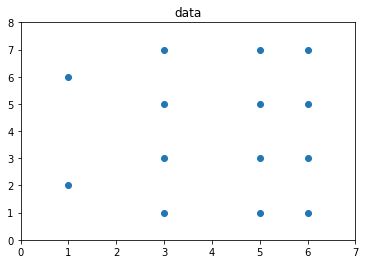

In [ ]:
# 長さ1
x1 = np.array([5,	5,	5,	5,	6,	6,	6,	6])
y1 = np.array([1,	3,	5,	7,	1,	3,	5,	7])
# 長さ2
x2 = np.array([1, 1, 	3, 	3, 	3,	3])
y2 = np.array([2,	6,	1,	3,	5,	7])

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

#1次元目をx，2次元目をyとする行列を作成
node_data = np.c_[x, y]
node_data1 = np.c_[x1, y1]
node_data2 = np.c_[x2, y2]


#x軸とy軸の幅を設定する
plt.xlim([0, 7])
plt.ylim([0, 8])
plt.title('data')
#散布図を作成
plt.scatter(x, y)
plt.show()

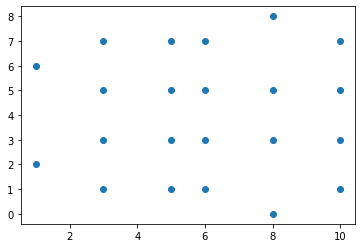

In [ ]:
# 長さ1
x1 = np.array([5,	5,	5,	5,	6,	6,	6,	6,	10, 10,	10,	10])
y1 = np.array([1,	3,	5,	7,	1,	3,	5,	7,	1,	3,	5,	7])
# 長さ2
x2 = np.array([1, 1, 	3, 	3, 	3,	3, 8,	8, 8,	8])
y2 = np.array([2,	6,	1,	3,	5,	7, 0, 3, 5, 8])

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

#1次元目をx，2次元目をyとする行列を作成
node_data = np.c_[x, y]
node_data1 = np.c_[x1, y1]
node_data2 = np.c_[x2, y2]


#x軸とy軸の幅を設定する
#plt.xlim([0, 9])
#plt.ylim([-1, 9])
#plt.title('data')
#散布図を作成
plt.scatter(x, y)
plt.show()

In [ ]:
# クラスタ数
n_clusters = 4
# 最大ループ数
max_iter = 300
# クラスタ毎の線分の各長さの数
# [クラスタ, 線分の各長さの数]
clusters_segment_length = np.array([[3,2],[3,3],[3,2],[3,3]])

In [ ]:
# 初期点決定
centroids = np.array([[8,0],[8,3],[8,5],[8,8]])
# クラスタの初期宣言
clusters = np.zeros(len(node_data))
clusters1 = np.zeros(len(node_data1))
clusters2 = np.zeros(len(node_data2))

In [ ]:
for _ in range(max_iter):
  csl = clusters_segment_length.copy()
  #print(csl)
  distance1 = np.array([np.linalg.norm(node_data1 - c, axis = 1) for c in centroids])
  distance2 = np.array([np.linalg.norm(node_data2 - c, axis = 1) for c in centroids])
  #print(distance1)
  #print(distance2)
  #長さ1のグループ
  for node in enumerate(node_data1):
    clus = distance1[:,node[0]].argmin(axis=0)
    while(csl[clus,0]==0):
      distance1[clus, node[0]]=np.inf
      clus = distance1[:,node[0]].argmin(axis=0)
    clusters1[node[0]] = clus
    csl[clus,0] -= 1
    distance1[clus, node[0]]=np.inf
  #長さ2のグループ
  for node in enumerate(node_data2):
    clus = distance2[:,node[0]].argmin(axis=0)
    while(csl[clus,1]==0):
      distance2[clus, node[0]]=np.inf
      clus = distance2[:,node[0]].argmin(axis=0)
    clusters2[node[0]] = clus
    csl[clus,1] -= 1
    distance2[clus, node[0]]=np.inf
  # 収束判定
  new_clusters = np.r_[clusters1, clusters2]
  #print(distance1)
  #print(distance2)
  #print(clusters1)
  #print(clusters2)
  #print(clusters)
  #print(new_clusters)
  if np.allclose(clusters, new_clusters):
    break
  clusters = new_clusters
  # 重心の更新
  # 各クラスタのデータ点の平均をとる
  centroids = np.array([node_data[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])
  #print(centroids)

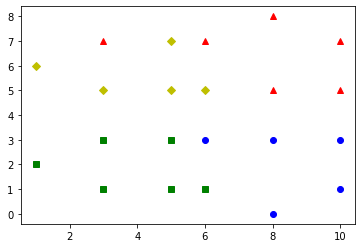

In [ ]:
# 色とマーカーの形を設定
colors = ['b','g','y','r']
markers = ['o','s','D','^']

for i, l in enumerate(clusters):
  plt.plot(x[i],y[i], color=colors[int(l)],marker=markers[int(l)], ls='None')
#plt.xlim([0, 9])
#plt.ylim([-1, 9])
plt.show()